<a href="https://colab.research.google.com/github/shabianay/Belajar-Analisis-Big-Data/blob/main/Belajaran_Data_Analis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [ ]:
data = pd.read_csv("Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
print ("Shape data (baris, kolom):"+ str(data.shape))

Shape data (baris, kolom):(215, 15)


In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
for col in data.columns:
   if data.dtypes[col] != "object":
       continue
   print('-' * 40 + col + '-' * 40 , end=' - ')
   display(data[col].value_counts().head(10))

----------------------------------------gender---------------------------------------- - 

M    139
F     76
Name: gender, dtype: int64

----------------------------------------ssc_b---------------------------------------- - 

Central    116
Others      99
Name: ssc_b, dtype: int64

----------------------------------------hsc_b---------------------------------------- - 

Others     131
Central     84
Name: hsc_b, dtype: int64

----------------------------------------hsc_s---------------------------------------- - 

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

----------------------------------------degree_t---------------------------------------- - 

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

----------------------------------------workex---------------------------------------- - 

No     141
Yes     74
Name: workex, dtype: int64

----------------------------------------specialisation---------------------------------------- - 

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

----------------------------------------status---------------------------------------- - 

Placed        148
Not Placed     67
Name: status, dtype: int64

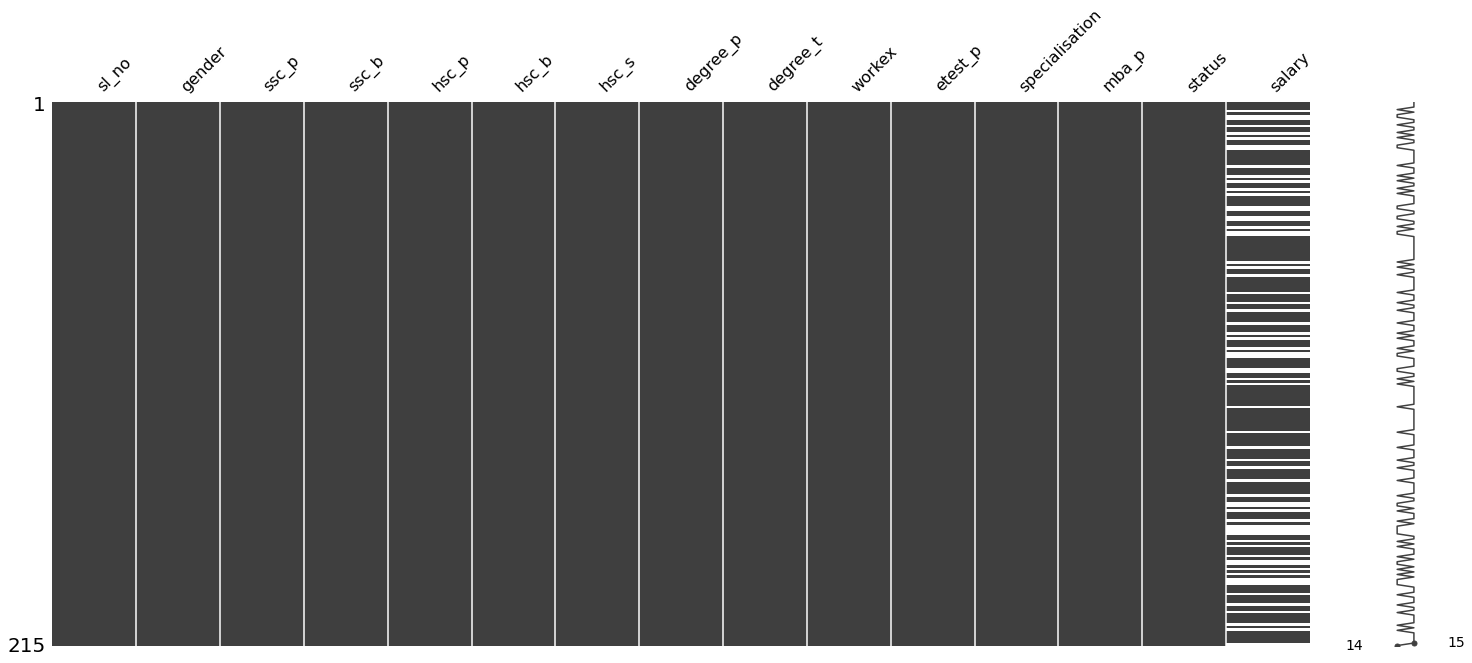

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data['salary'].fillna(value=0, inplace=True)

In [ ]:
data.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Persentase Ketrima Kerja')

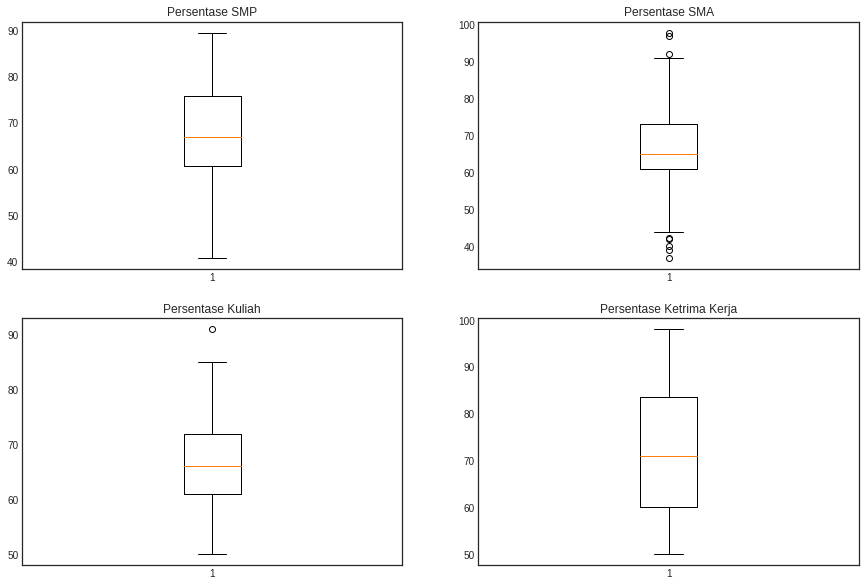

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('Persentase SMP')
ax=plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('Persentase SMA')
ax=plt.subplot(223)
plt.boxplot(data['degree_p'])
ax.set_title('Persentase Kuliah')
ax=plt.subplot(224)
plt.boxplot(data['etest_p'])
ax.set_title('Persentase Ketrima Kerja')

In [ ]:
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['hsc_p'] >= Q1 - 1.5 * IQR) & (data['hsc_p'] <= Q3 + 1.5 *IQR)
data_filtered=data.loc[filter]

Text(0.5, 1.0, 'Persentase Ketrima Kerja')

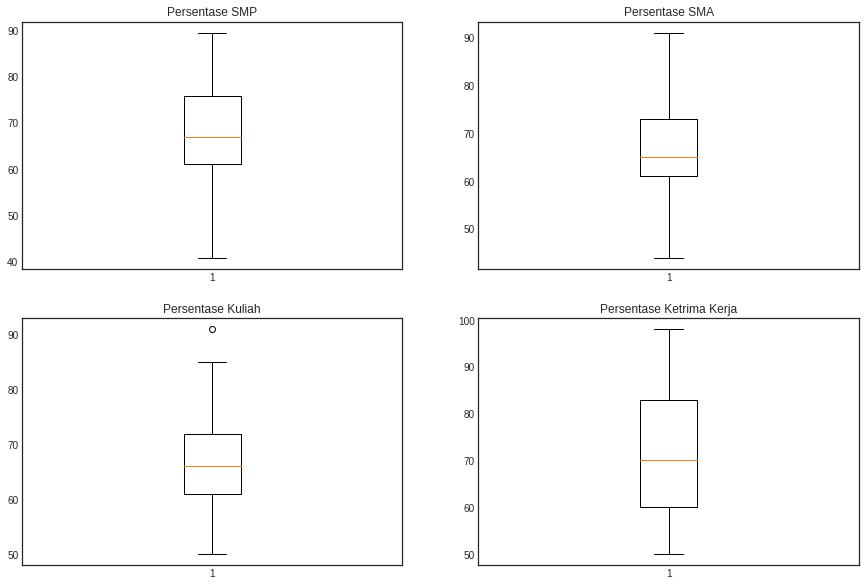

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered['ssc_p'])
ax.set_title('Persentase SMP')
ax=plt.subplot(222)
plt.boxplot(data_filtered['hsc_p'])
ax.set_title('Persentase SMA')
ax=plt.subplot(223)
plt.boxplot(data_filtered['degree_p'])
ax.set_title('Persentase Kuliah')
ax=plt.subplot(224)
plt.boxplot(data_filtered['etest_p'])
ax.set_title('Persentase Ketrima Kerja')